<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 166.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 150.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 153.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 147.3 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
# 1. Check missing values in the selected columns
missing_values = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("Missing values before imputation:\n", missing_values)

# 2. Impute missing values in categorical columns with the most frequent value
for col in ['Employment', 'JobSat', 'RemoteWork']:
    most_frequent = df[col].mode()[0]  # Get the mode
    df[col].fillna(most_frequent, inplace=True)

# 3. Verify that missing values are handled
missing_after_imputation = df[['Employment', 'JobSat', 'RemoteWork']].isnull().sum()
print("\nMissing values after imputation:\n", missing_after_imputation)


Missing values before imputation:
 Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing values after imputation:
 Employment    0
JobSat        0
RemoteWork    0
dtype: int64


/tmp/ipykernel_300/1906842332.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


/tmp/ipykernel_300/2497350865.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_jobsat = df.groupby('ExperienceRange')['JobSat'].median()


Median Job Satisfaction by Experience Range:
ExperienceRange
0-5      8.0
5-10     8.0
10-20    8.0
>20      8.0
Name: JobSat, dtype: float64


/tmp/ipykernel_300/2497350865.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=median_jobsat.index, y=median_jobsat.values, palette='viridis')


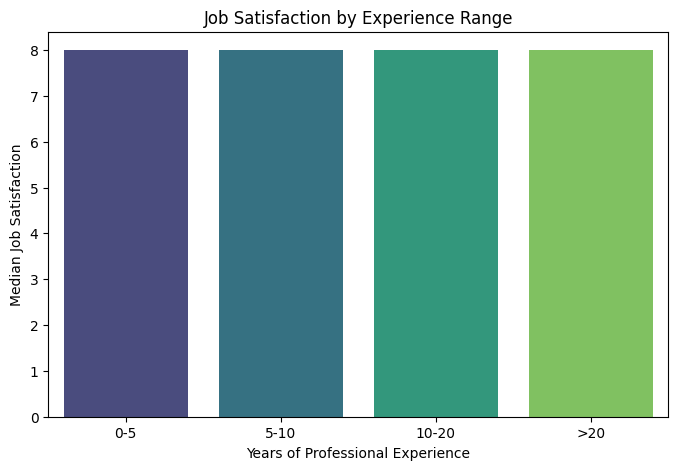

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert YearsCodePro to numeric, coerce errors to NaN
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Define experience bins and labels
bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '>20']

# Create a new column for experience ranges
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

# Convert JobSat to numeric, coercing non-numeric values to NaN
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')

# Calculate median JobSat per experience range
median_jobsat = df.groupby('ExperienceRange')['JobSat'].median()

print("Median Job Satisfaction by Experience Range:")
print(median_jobsat)

# Visualization using bar plot
plt.figure(figsize=(8,5))
sns.barplot(x=median_jobsat.index, y=median_jobsat.values, palette='viridis')
plt.xlabel('Years of Professional Experience')
plt.ylabel('Median Job Satisfaction')
plt.title('Job Satisfaction by Experience Range')
plt.show()


#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_300/78529076.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, order=df['JobSat'].value_counts().index, palette='viridis')


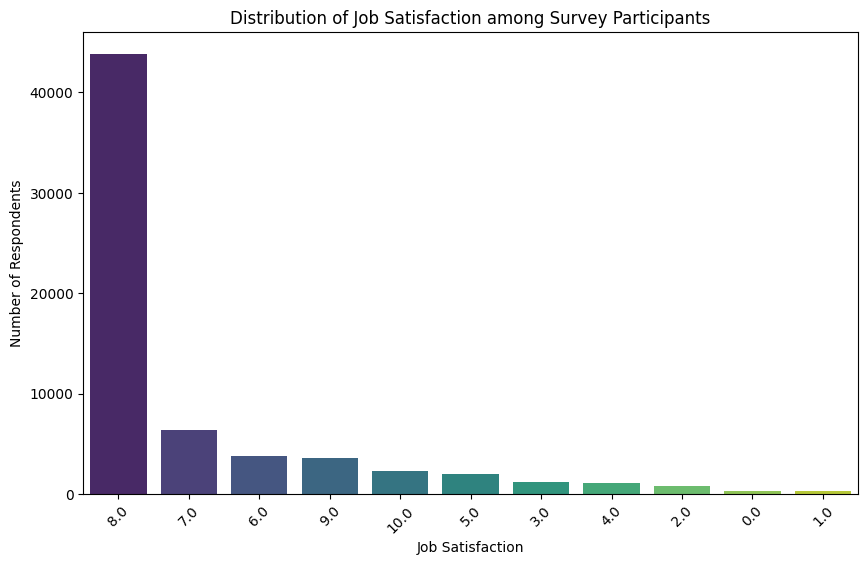

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert JobSat to a categorical variable if not already
df['JobSat'] = df['JobSat'].astype(str)

# Set plot size
plt.figure(figsize=(10,6))

# Count plot
sns.countplot(x='JobSat', data=df, order=df['JobSat'].value_counts().index, palette='viridis')

# Add labels and title
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Job Satisfaction among Survey Participants')
plt.xticks(rotation=45)
plt.show()


#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_300/824947827.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='RemoteWork', data=df, order=df['RemoteWork'].value_counts().index, palette='coolwarm')


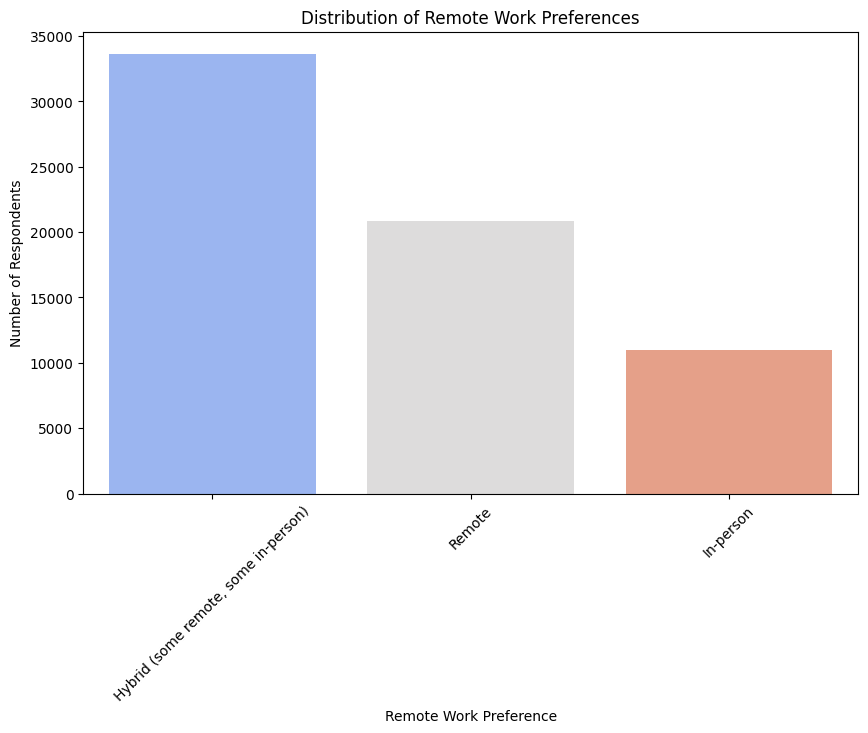

Cross-tabulation of Remote Work by Employment Type:
RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                                17296   
Employed, full-time;Employed, part-time                                               85   
Employed, full-time;Independent contractor, fre...                                  1330   
Employed, full-time;Independent contractor, fre...                                    80   
Employed, full-time;Independent contractor, fre...                                     0   
...                                                                                  ...   
Student, full-time;Student, part-time;Employed,...                                     4   
Student, full-time;Student, part-time;Retired                                          2   
Student, part-time          

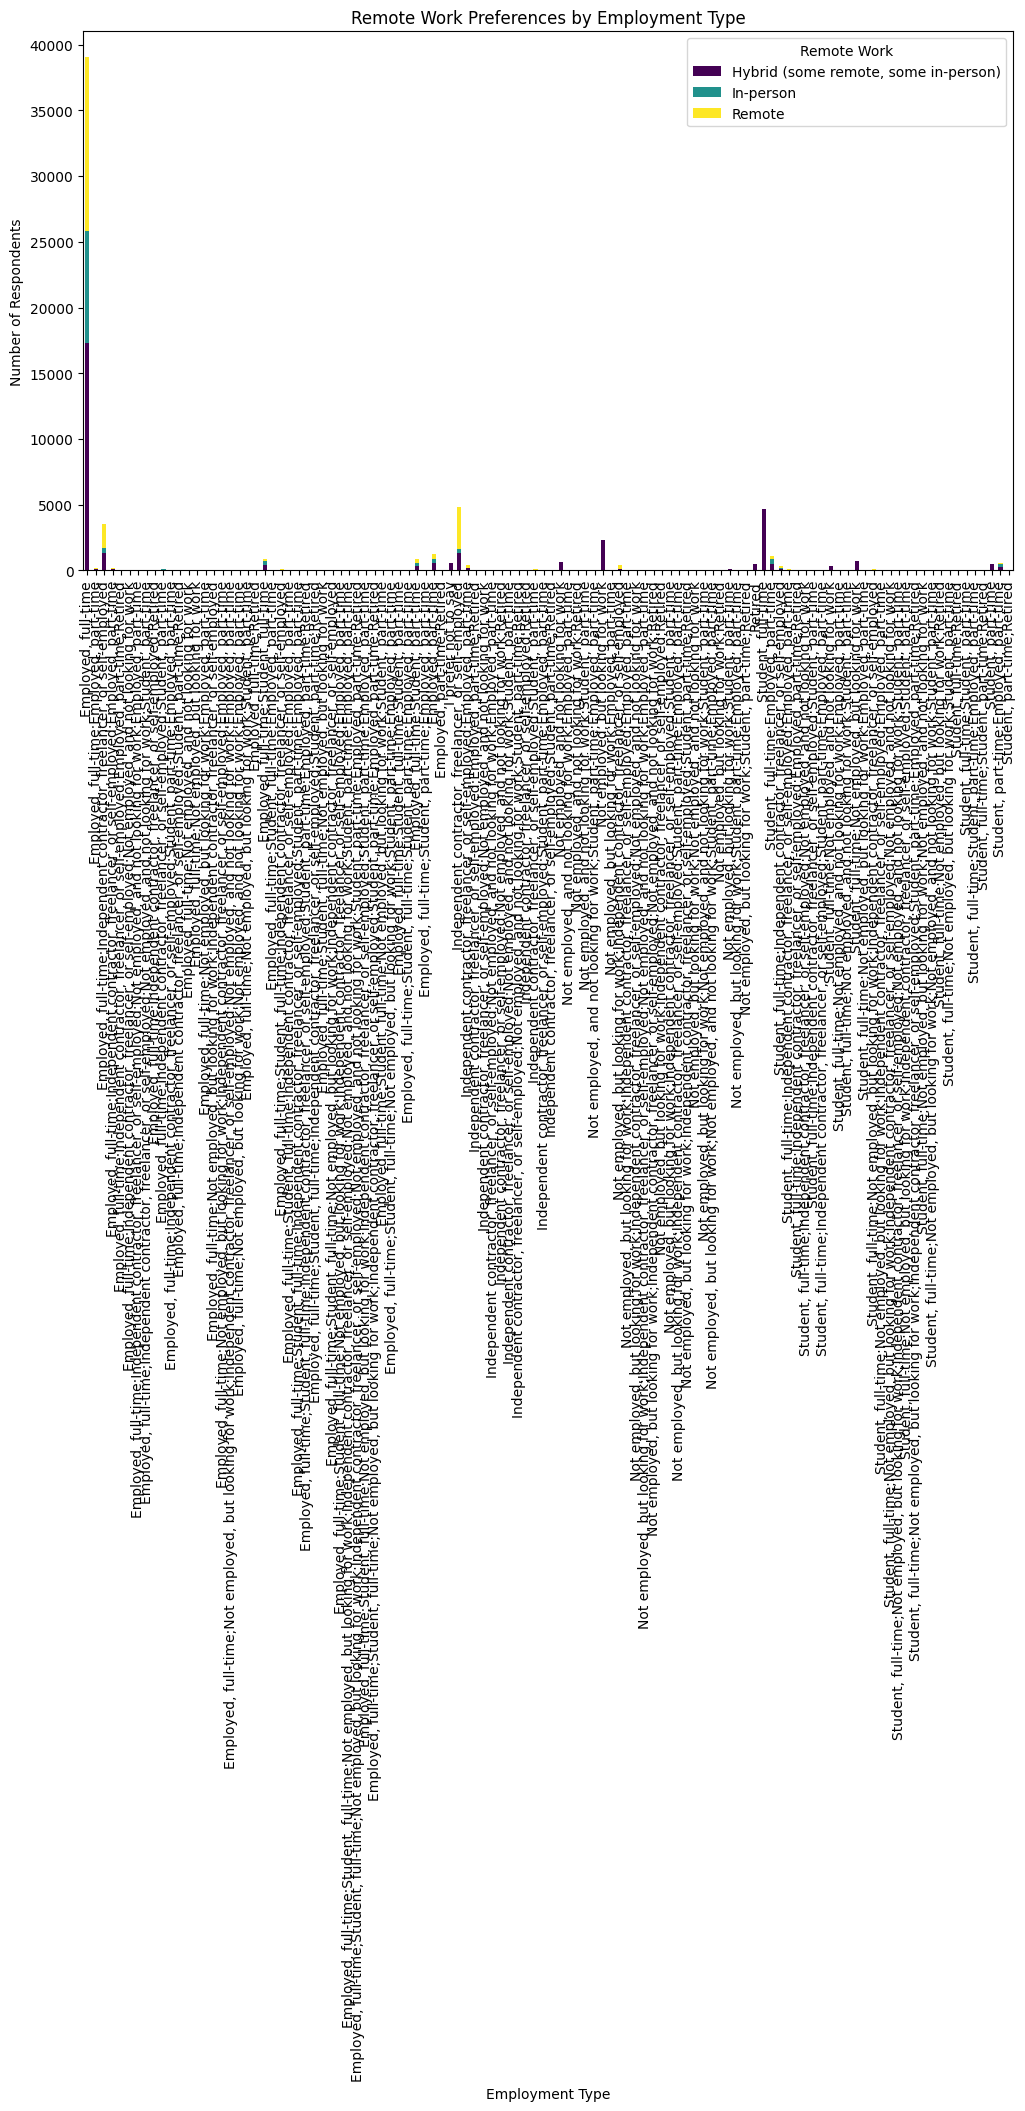

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure RemoteWork and Employment columns are string type
df['RemoteWork'] = df['RemoteWork'].astype(str)
df['Employment'] = df['Employment'].astype(str)

# 1. Count plot for RemoteWork distribution
plt.figure(figsize=(10,6))
sns.countplot(x='RemoteWork', data=df, order=df['RemoteWork'].value_counts().index, palette='coolwarm')
plt.xlabel('Remote Work Preference')
plt.ylabel('Number of Respondents')
plt.title('Distribution of Remote Work Preferences')
plt.xticks(rotation=45)
plt.show()

# 2. Cross-tabulate RemoteWork by Employment type
remote_by_employment = pd.crosstab(df['Employment'], df['RemoteWork'])
print("Cross-tabulation of Remote Work by Employment Type:")
print(remote_by_employment)

# Optional: visualize cross-tab with stacked bar plot
remote_by_employment.plot(kind='bar', stacked=True, figsize=(12,7), colormap='viridis')
plt.xlabel('Employment Type')
plt.ylabel('Number of Respondents')
plt.title('Remote Work Preferences by Employment Type')
plt.legend(title='Remote Work')
plt.show()


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


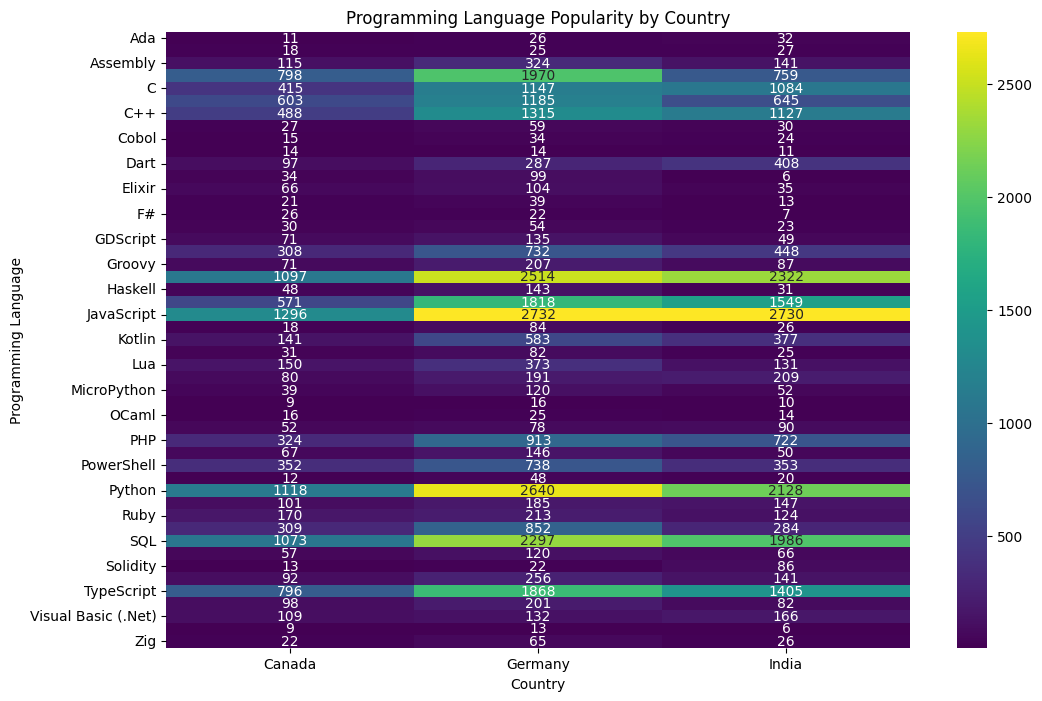

/tmp/ipykernel_300/1595742278.py:30: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_languages = language_counts.groupby('Country').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)


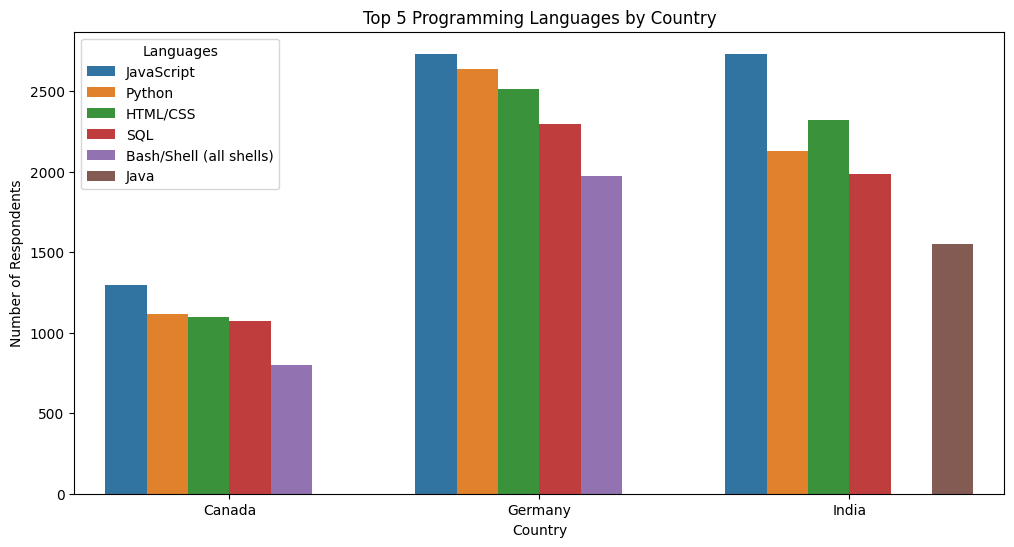

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Split the 'LanguageHaveWorkedWith' column into lists
df['Languages'] = df['LanguageHaveWorkedWith'].str.split(';')

# Explode the list so each language gets its own row
df_exploded = df.explode('Languages')

# Optional: filter for a specific country or top countries
top_countries = ['United States', 'India', 'Germany', 'Canada']
df_filtered = df_exploded[df_exploded['Country'].isin(top_countries)]

# Count occurrences of each language by country
language_counts = df_filtered.groupby(['Country', 'Languages']).size().reset_index(name='Count')

# Pivot the data for visualization
language_pivot = language_counts.pivot(index='Languages', columns='Country', values='Count').fillna(0)

# Visualize using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(language_pivot, annot=True, fmt=".0f", cmap='viridis')
plt.title('Programming Language Popularity by Country')
plt.xlabel('Country')
plt.ylabel('Programming Language')
plt.show()

# Optional: top 5 languages per country as a bar plot
top_languages = language_counts.groupby('Country').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)
plt.figure(figsize=(12,6))
sns.barplot(data=top_languages, x='Country', y='Count', hue='Languages')
plt.title('Top 5 Programming Languages by Country')
plt.ylabel('Number of Respondents')
plt.show()


#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


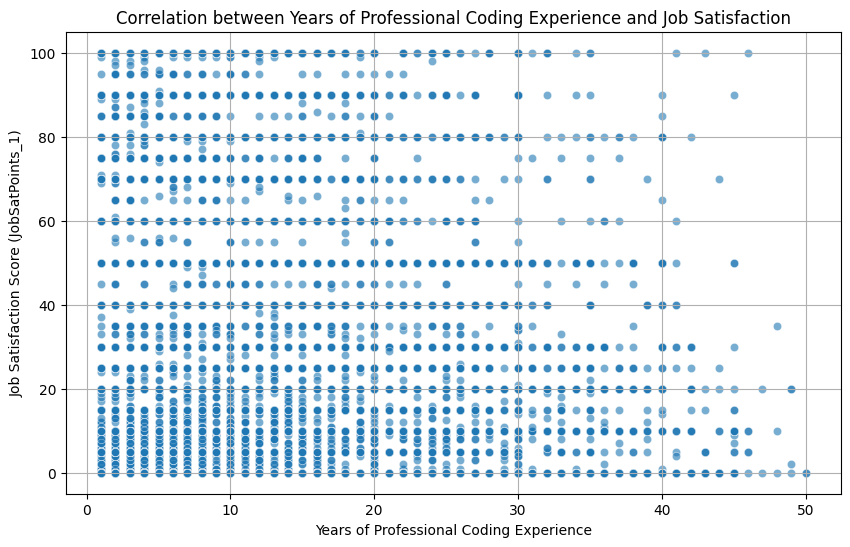

Correlation coefficient: -0.03


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure YearsCodePro is numeric
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values in YearsCodePro or JobSatPoints_1
df_corr = df[['YearsCodePro_numeric', 'JobSatPoints_1']].dropna()

# Scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_corr, x='YearsCodePro_numeric', y='JobSatPoints_1', alpha=0.6)
plt.title('Correlation between Years of Professional Coding Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score (JobSatPoints_1)')
plt.grid(True)
plt.show()

# Optional: compute correlation coefficient
correlation = df_corr['YearsCodePro_numeric'].corr(df_corr['JobSatPoints_1'])
print(f"Correlation coefficient: {correlation:.2f}")


#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


Employment                                          Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1059   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      16806   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   11011   
Primary/elementary school                                           160   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2073   
Secondary school (e.g. American high school, Ge...                 1460   
Some college/university study without earning a...                 3579   
Something else                                                      377   

Employment                                          Employed, full-time;Employed, part-time  \
EdLevel                                                                                       
Associate degree (A.A., A.S., etc.)                        

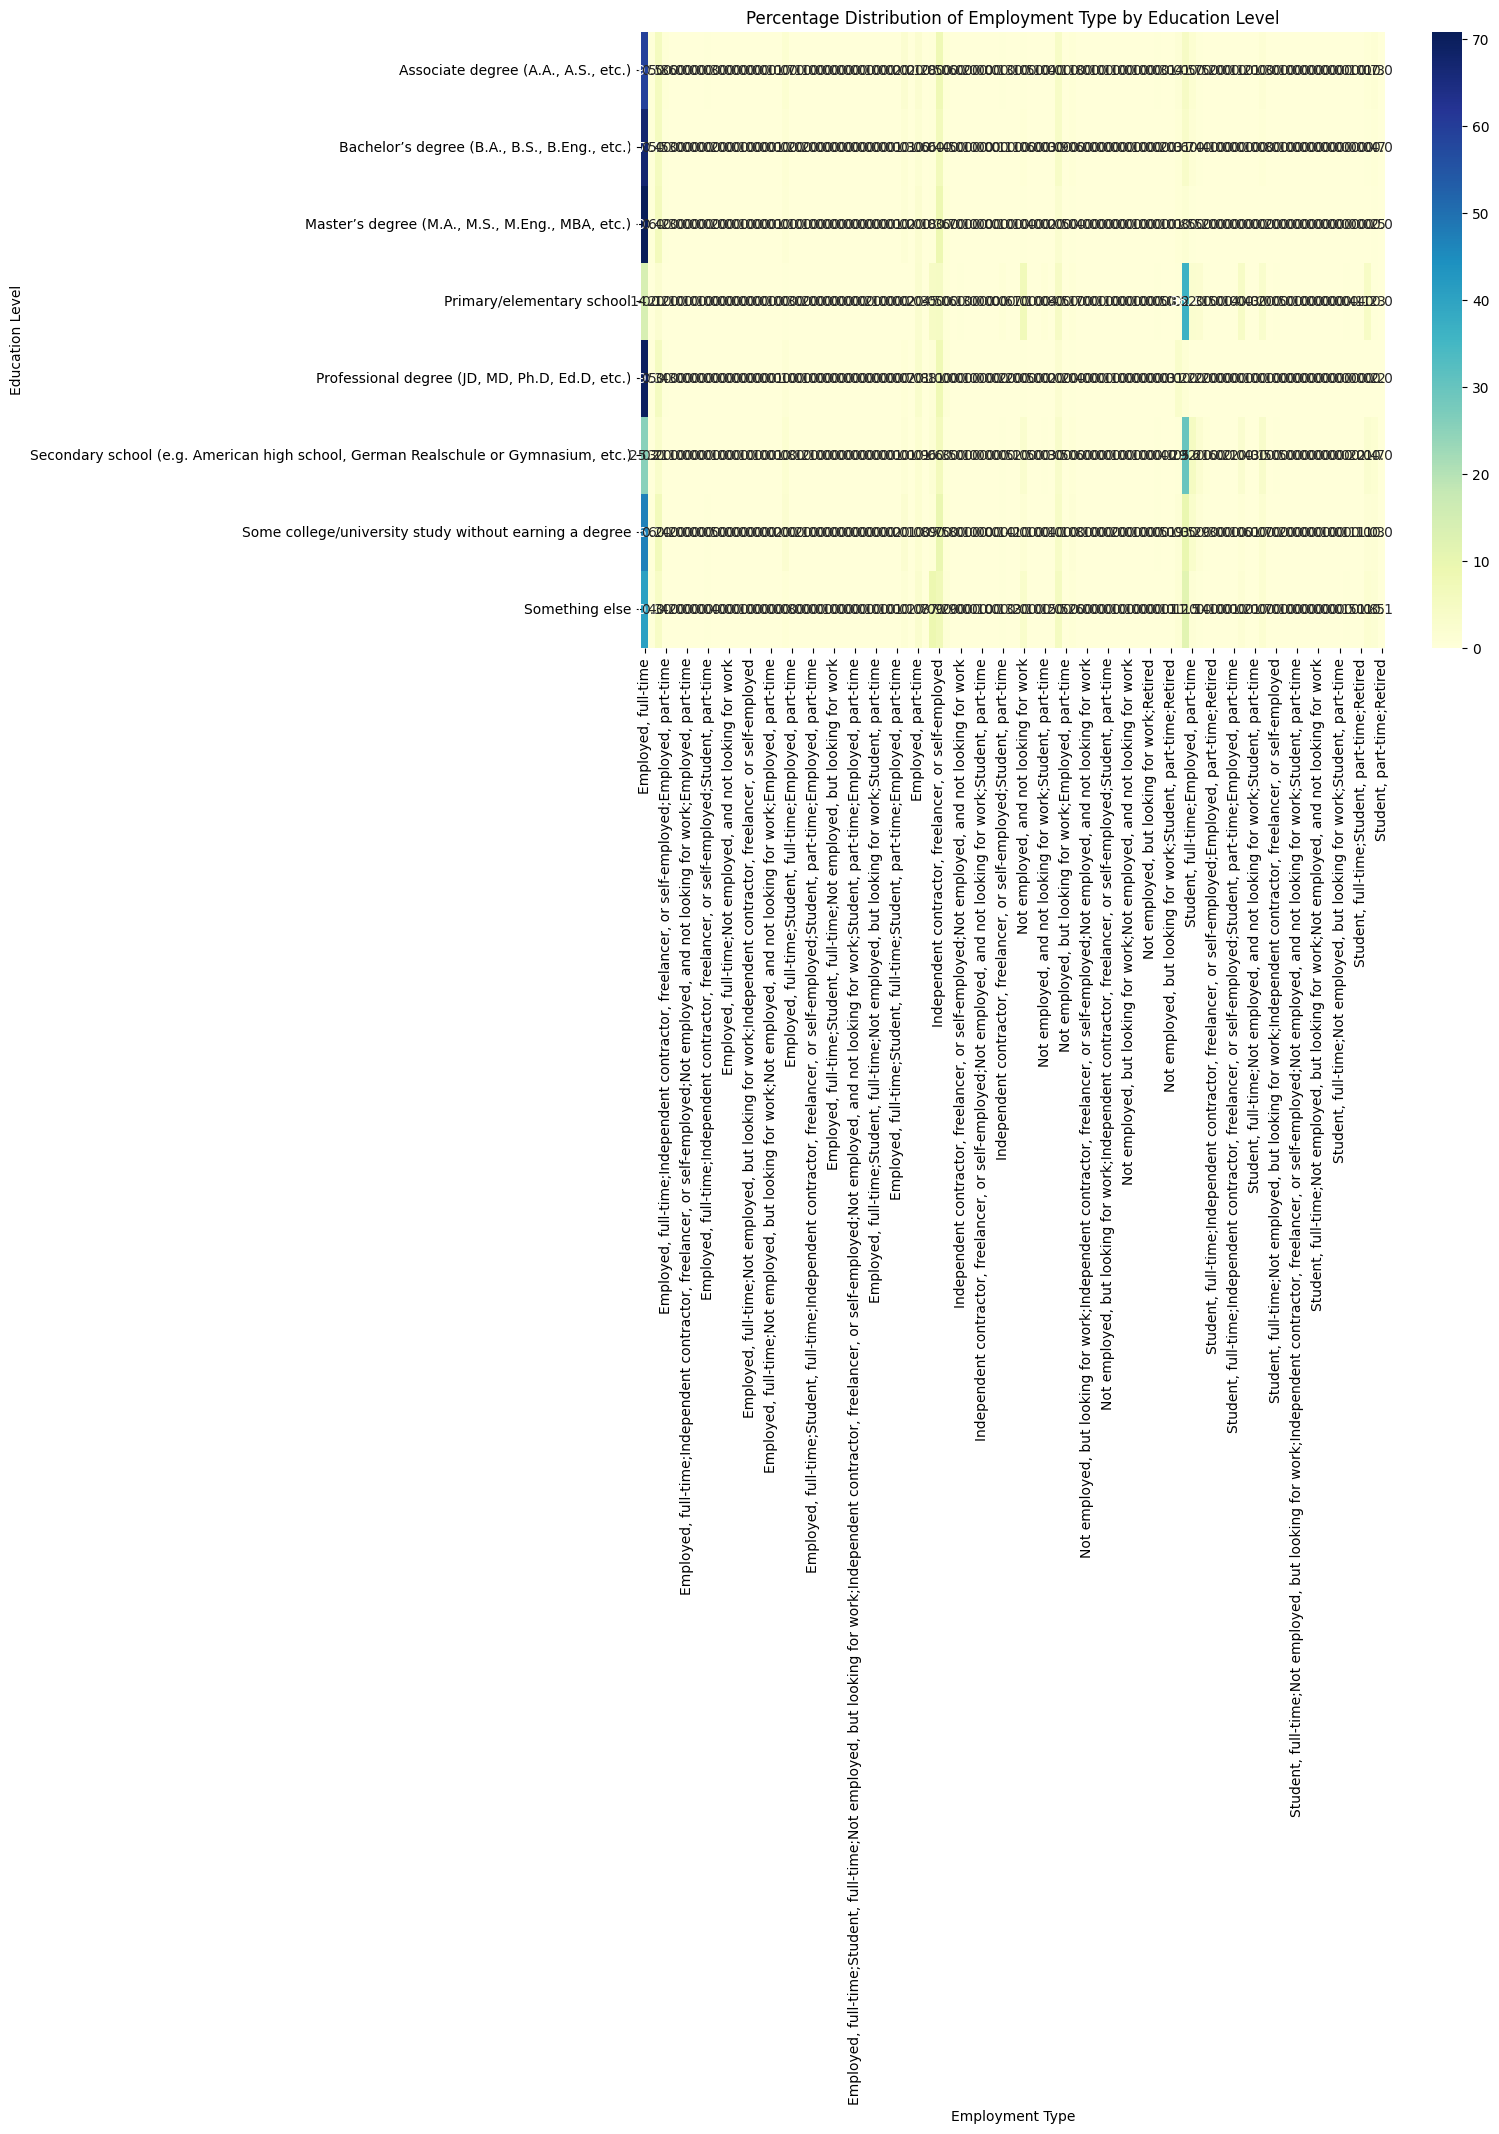

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in EdLevel or Employment
df_ed_emp = df[['EdLevel', 'Employment']].dropna()

# Cross-tabulation
ed_emp_crosstab = pd.crosstab(df_ed_emp['EdLevel'], df_ed_emp['Employment'])
print(ed_emp_crosstab)

# Normalize to show percentages for better visualization
ed_emp_percent = ed_emp_crosstab.div(ed_emp_crosstab.sum(axis=1), axis=0) * 100

# Heatmap visualization
plt.figure(figsize=(12,8))
sns.heatmap(ed_emp_percent, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Percentage Distribution of Employment Type by Education Level")
plt.xlabel("Employment Type")
plt.ylabel("Education Level")
plt.show()


#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
import pandas as pd

# Assume 'df' is your cleaned DataFrame

# Save as CSV
df.to_csv("stack_overflow_cleaned.csv", index=False)

# Save as Excel
df.to_excel("stack_overflow_cleaned.xlsx", index=False)

# Confirmation print
print("Files have been saved! Check the 'Files' pane on the left in Skills Network Labs to download them.")


<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
